## 프로젝트 세팅

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

sklearn.set_config(transform_output="pandas", display='diagram')

import warnings
warnings.filterwarnings("ignore")

## 데이터셋 1

### 데이터 불러오기

In [2]:
data = pd.read_csv("./HW4_data1.csv", index_col=0)
data.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,y
0,5.723542,4.482566,4.204337,M,5.218279,quartz-grey,Llama,6.424907,6.040468,6.899058,...,3.550530,3.631856,Jackfruit,8.920213,9.402886,6.741593,8.577235,5.497520,2.097549,0.0
1,4.983732,3.631057,5.766472,J,4.906907,lilac,Lamprey,3.506197,4.230639,7.635865,...,2.682704,4.239555,Miracle fruit,6.345475,7.170393,5.192000,6.441663,6.796859,4.620393,0.0
2,4.399492,4.645097,6.188226,M,3.313293,lemon,Platypus,4.029494,5.000917,7.061001,...,5.091105,3.644647,Huckleberry,4.589988,5.765265,4.569449,6.218927,3.659973,4.343842,0.0
3,3.572215,5.924349,5.726074,Q,5.412855,platinum,Minnow,5.636589,5.428306,3.834625,...,8.179666,5.209759,Melon,6.124530,1.301234,5.215009,1.071177,6.457292,2.413839,1.0
4,7.295786,4.311653,3.906815,J,6.803906,powder-blue,Mole,5.666194,4.486054,7.506939,...,3.490580,7.495317,Honeyberry,8.516145,8.662919,4.851856,7.471812,5.077030,2.085922,0.0


### 데이터 형태 분석


In [3]:
data.shape

(8000, 26)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      8000 non-null   float64
 1   x1      8000 non-null   float64
 2   x2      8000 non-null   float64
 3   x3      8000 non-null   object 
 4   x4      8000 non-null   float64
 5   x5      8000 non-null   object 
 6   x6      7894 non-null   object 
 7   x7      8000 non-null   float64
 8   x8      8000 non-null   float64
 9   x9      8000 non-null   float64
 10  x10     8000 non-null   float64
 11  x11     8000 non-null   float64
 12  x12     8000 non-null   object 
 13  x13     8000 non-null   float64
 14  x14     7963 non-null   float64
 15  x15     8000 non-null   float64
 16  x16     8000 non-null   float64
 17  x17     8000 non-null   float64
 18  x18     8000 non-null   object 
 19  x19     7804 non-null   float64
 20  x20     8000 non-null   float64
 21  x21     8000 non-null   float64
 22  

In [5]:
data.describe()

,x0,x1,x2,x4,x7,x8,x9,x10,x11,x13,...,x15,x16,x17,x19,x20,x21,x22,x23,x24,y
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,...,8000.000000,8000.000000,8000.000000,7804.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,6.020925,5.002298,5.006490,5.010165,4.994866,4.988556,5.001448,5.000635,5.000822,5.280064,...,4.996366,5.009204,4.988157,5.996468,5.419408,4.994681,5.006713,5.004319,4.021410,0.499750
std,1.468327,1.007008,0.994745,0.998533,0.989425,1.006132,2.042641,2.158869,1.005298,3.506108,...,0.996068,1.976642,0.990755,1.592698,2.328843,1.008270,2.071283,1.005399,1.284271,0.500031
min,0.333749,1.153590,1.365331,1.390135,1.383309,1.120931,-1.976842,-2.186785,0.919167,-9.102149,...,1.085294,-3.181196,1.146093,-0.461355,-3.183460,1.233812,-2.177307,1.147918,-0.660402,0.000000
25%,5.084898,4.314174,4.354835,4.335946,4.337463,4.319867,3.557626,3.526224,4.316858,2.892785,...,4.319046,3.605348,4.320516,4.931302,3.803460,4.310335,3.556410,4.334203,3.176063,0.000000
50%,6.030395,5.008650,5.006615,5.009480,4.998617,4.980311,4.842104,4.798179,5.020216,5.056152,...,5.003211,4.808159,4.986541,5.993851,5.584150,4.975163,4.971446,5.018116,4.017129,0.000000
75%,6.979738,5.679550,5.669608,5.690736,5.652184,5.655796,6.301439,6.303676,5.663585,7.468442,...,5.680272,6.271211,5.662045,7.029309,7.093313,5.671244,6.393748,5.666826,4.874476,1.000000
max,11.526824,9.100342,9.227136,8.980531,9.694473,8.809648,12.646833,14.127604,8.963162,18.885863,...,8.568468,13.052701,8.525690,12.435226,12.697648,9.298278,13.841689,8.879828,8.404609,1.000000


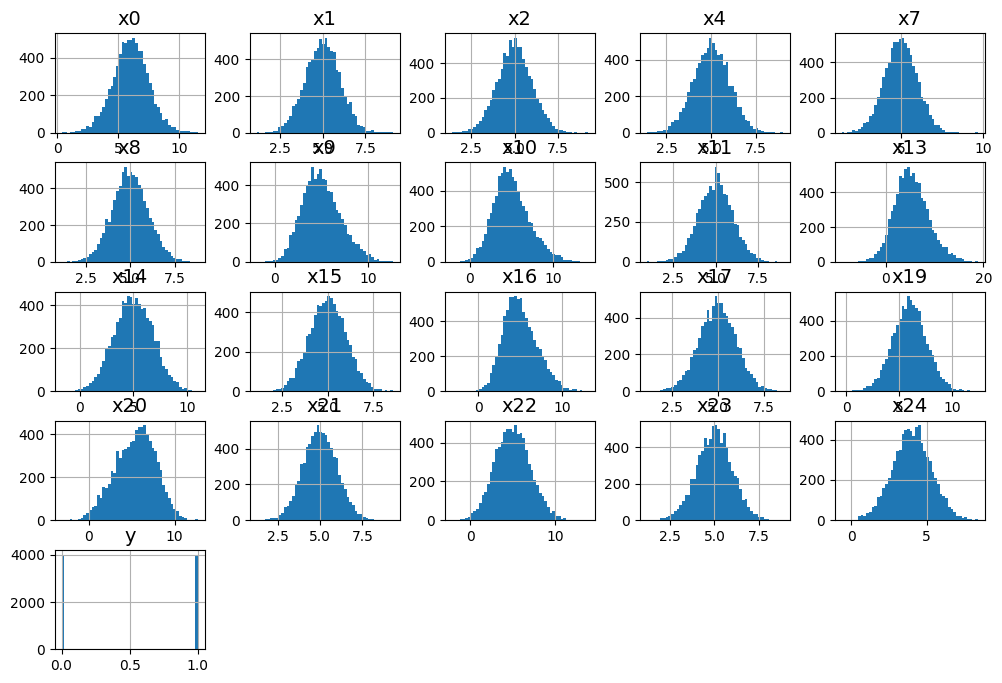

In [6]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data.hist(bins=50, figsize=(12, 8))
plt.show()

**데이터 기본 특성**
1. x3, x5, x6, x12, x18 총 5개 데이터가 문자열이다.
2. x6, x14, x19 총 3개 데이터에 결측치가 존재한다.
3. 숫자형 데이터의 전반적인 스케일은 비슷하다.
4. 숫자형 데이터가 정규 분포 형태로 이쁘다.

In [7]:
columns = ['x3', 'x5', 'x6', 'x12', 'x18']

for column in columns:
    value_counts = data[column].value_counts()
    print(f"\n### {column} ###")
    print(value_counts)


### x3 ###
M    1077
L    1062
K    1029
J     922
N     853
I     624
O     596
H     453
P     420
Q     287
G     229
R     122
F     118
E      70
S      70
D      25
T      24
C       7
U       6
B       2
V       2
Y       1
A       1
Name: x3, dtype: int64

### x5 ###
magenta       368
lavender      352
lemon         346
lilac         343
ivory         343
             ... 
bondi-blue      2
apricot         1
silver          1
slate-grey      1
spring-bud      1
Name: x5, Length: 67, dtype: int64

### x6 ###
list           457
Hyena           71
Impala          66
Hoverfly        64
Hummingbird     62
              ... 
Boa              1
Tiglon           1
Badger           1
Shrew            1
Bird             1
Name: x6, Length: 327, dtype: int64

### x12 ###
khaki               191
lavender            190
lime                184
kelly-green         179
lime-green          175
                   ... 
carrot-orange         1
sangria               1
camouflage-green      1
sky-

**문자열 데이터 특성**
1. x3는 영어 알파벳을 범주로 가진다.
2. x5는 색상을 범주로 가진다.
3. x6는 동물을 범주로 가진다. 다만 list는 무엇인지 잘 모르겠지만 데이터도 많고 특별한 범주인 것 같다.
4. x12는 색상을 범주로 가진다.
5. x18는 과일을 범주로 가진다.
6. 모든 데이터에 매우 낮은 빈도로 등장하는 범주가 있다.
---
**처리 방법 후보**
1. 기타 범주로 묶어버리기
2. 해당 데이터 삭제하기


In [8]:
count_y_0 = data[data['y'] == 0].shape[0]
count_y_1 = data[data['y'] == 1].shape[0]
print("전체 y=0인 개수:", count_y_0)
print("전체 y=1인 개수:", count_y_1)

전체 y=0인 개수: 4002
전체 y=1인 개수: 3998


In [9]:
temp = data[pd.isnull(data['x6'])]
count_y_0 = temp[temp['y'] == 0].shape[0]
count_y_1 = temp[temp['y'] == 1].shape[0]
print("y=0인 개수:", count_y_0)
print("y=1인 개수:", count_y_1)

y=0인 개수: 60
y=1인 개수: 46


In [10]:
temp = data[pd.isnull(data['x14'])]
count_y0 = temp[temp['y'] == 0].shape[0]
count_y1 = temp[temp['y'] == 1].shape[0]
print("y=0인 개수:", count_y0)
print("y=1인 개수:", count_y1)

y=0인 개수: 21
y=1인 개수: 16


In [11]:
temp = data[pd.isnull(data['x19'])]
count_y_0 = temp[temp['y'] == 0].shape[0]
count_y_1 = temp[temp['y'] == 1].shape[0]
print("y=0인 개수:", count_y_0)
print("y=1인 개수:", count_y_1)

y=0인 개수: 99
y=1인 개수: 97


**결측치 데이터 특성**

1. 결측치에 대한 분포를 살펴본 결과 y=0, y=1 분포가 적당히 나눠져있다.

---

**처리 방법 후보**

1. 결측치가 있는 행은 삭제한다.
2. KNN으로 채워준다.
3. 평균이나 최빈값으로 채워준다.

### 데이터 전처리

In [12]:
data = data.dropna(axis=0)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7665 entries, 0 to 7999
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      7665 non-null   float64
 1   x1      7665 non-null   float64
 2   x2      7665 non-null   float64
 3   x3      7665 non-null   object 
 4   x4      7665 non-null   float64
 5   x5      7665 non-null   object 
 6   x6      7665 non-null   object 
 7   x7      7665 non-null   float64
 8   x8      7665 non-null   float64
 9   x9      7665 non-null   float64
 10  x10     7665 non-null   float64
 11  x11     7665 non-null   float64
 12  x12     7665 non-null   object 
 13  x13     7665 non-null   float64
 14  x14     7665 non-null   float64
 15  x15     7665 non-null   float64
 16  x16     7665 non-null   float64
 17  x17     7665 non-null   float64
 18  x18     7665 non-null   object 
 19  x19     7665 non-null   float64
 20  x20     7665 non-null   float64
 21  x21     7665 non-null   float64
 22  

**결측치 처리**
- 결측치를 가진 행은 삭제하였다.

In [14]:
target_columns = ['x5', 'x6', 'x12', 'x18']
threshold = 5

for column in target_columns:
    value_counts = data[column].value_counts()
    data[column] = data[column].replace(value_counts[value_counts <= threshold].index, 'etc')

for column in target_columns:
    print(f"{column}:")
    print(data[column].value_counts())
    print("\n")

x5:
magenta             356
lemon               335
lavender            330
ivory               329
lilac               327
hollywood-cerise    322
mauve               316
kelly-green         315
lime-green          310
malachite           295
harlequin           289
grey                275
gamboge             237
mint-green          236
moss-green          235
french-rose         226
goldenrod           222
navy-blue           214
fern-green          204
myrtle              199
office-green        171
flax                168
eggplant            166
olivine             143
orchid              126
ecru                121
crimson             103
peach                98
pine-green           97
dandelion            96
periwinkle           87
cornflower           79
platinum             73
coral                72
powder-blue          63
cobalt               51
prussian-blue        49
etc                  45
chestnut             42
cinnabar             40
pumpkin              34
quartz-grey 

**범주형 데이터 처리 1**
- 범주형 데이터에서 빈도가 5보다 낮은 데이터는 etc로 분리하였다.
- 그냥 데이터를 삭제해도 되지만 빈도수가 낮다는 정보도 가치가 있다고 생각해 따로 etc로 분리하였다.
- 또한 원 핫 인코딩을 진행하고 etc 데이터가 의미가 없다면 weight가 낮을 것이기 때문에 남겨두어도 괜찮다고 판단하였다.

In [15]:
from sklearn.preprocessing import OneHotEncoder

target_columns = ['x3', 'x5', 'x6', 'x12', 'x18']

for column in target_columns:
    cat_encoder = OneHotEncoder(sparse_output=False)
    temp = data[[column]]
    temp_encoded = cat_encoder.fit_transform(temp)
    temp_encoded_df = pd.DataFrame(temp_encoded, columns=cat_encoder.get_feature_names_out([column]))
    data = data.drop(column, axis=1)
    data = pd.concat([data, temp_encoded_df], axis=1)

data.head()

,x0,x1,x2,x4,x7,x8,x9,x10,x11,x13,...,x18_Peach,x18_Pear,x18_Persimmon,x18_Physalis,x18_Plantain,x18_Plum,x18_Raisin,x18_Tangerine,x18_Watermelon,x18_etc
0,5.723542,4.482566,4.204337,5.218279,6.424907,6.040468,6.899058,4.004171,4.791005,10.626631,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.983732,3.631057,5.766472,4.906907,3.506197,4.230639,7.635865,6.393295,5.316598,11.264252,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.399492,4.645097,6.188226,3.313293,4.029494,5.000917,7.061001,4.829675,3.313627,7.426446,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.572215,5.924349,5.726074,5.412855,5.636589,5.428306,3.834625,7.496985,4.183823,6.386208,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7.295786,4.311653,3.906815,6.803906,5.666194,4.486054,7.506939,4.473839,5.195862,9.580001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**범주형 데이터 처리 2**
 - 원 핫 인코딩을 통해 범주형 데이터를 처리하였다.
 - 각 범주가 순서가 있지 않기 때문에 원 핫 인코딩을 사용하였다.

### 모델 학습 및 예측 결과

*트레인, 테스트 셋을 미리 분리하고 싶었으나 분리하였을 때 기타 카테고리로 묶는 것이나 범주형 데이터를 원핫 인코딩시 데이터의 열이 달라지는 문제의 해결법을 몰라 어쩔 수 없이 전처리 후 데이터를 분리하였습니다.*

In [16]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

X_train = train_set.drop('y', axis=1)
y_train = train_set['y']
X_test = test_set.drop('y', axis=1)
y_test = test_set['y']


### Random Forest ###
Accuracy: 0.8617
Precision: 0.8936
Recall: 0.8152
F1 Score: 0.8526
PR AUC: 0.9532


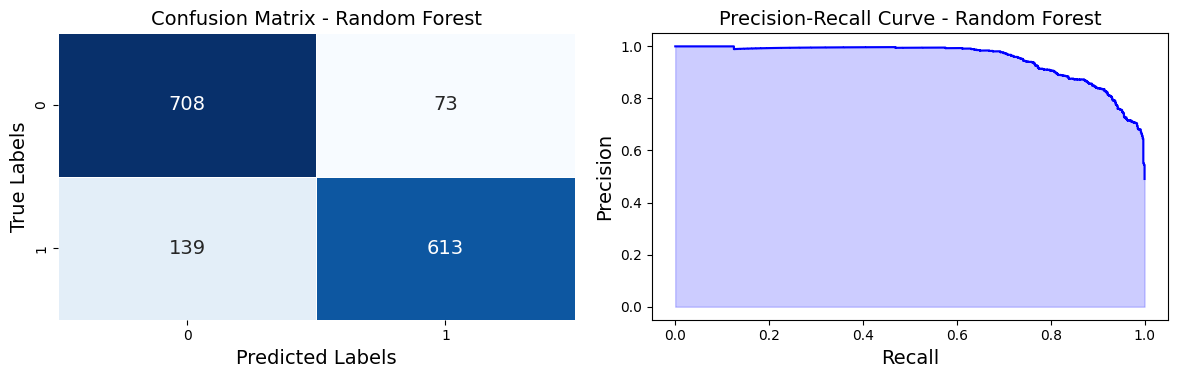


### AdaBoost ###
Accuracy: 0.9008
Precision: 0.9011
Recall: 0.8963
F1 Score: 0.8987
PR AUC: 0.9653


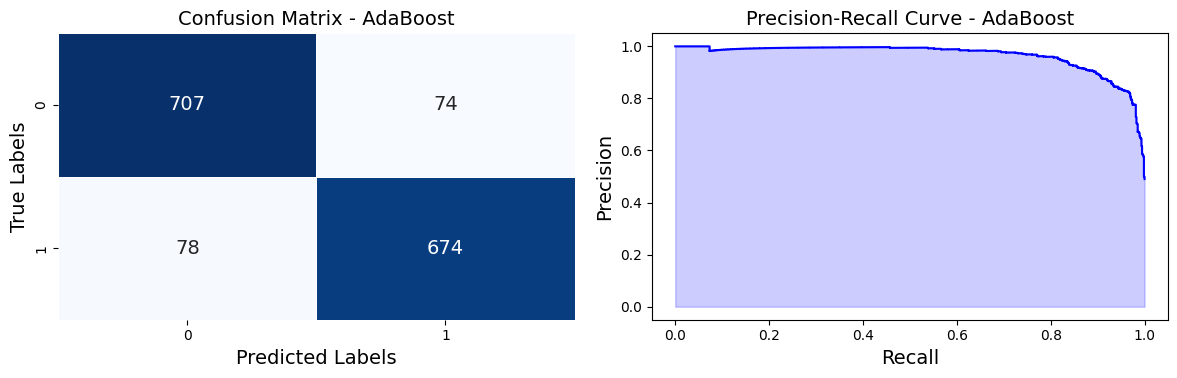


### Gradient Boosting ###
Accuracy: 0.9406
Precision: 0.9509
Recall: 0.9269
F1 Score: 0.9387
PR AUC: 0.9847


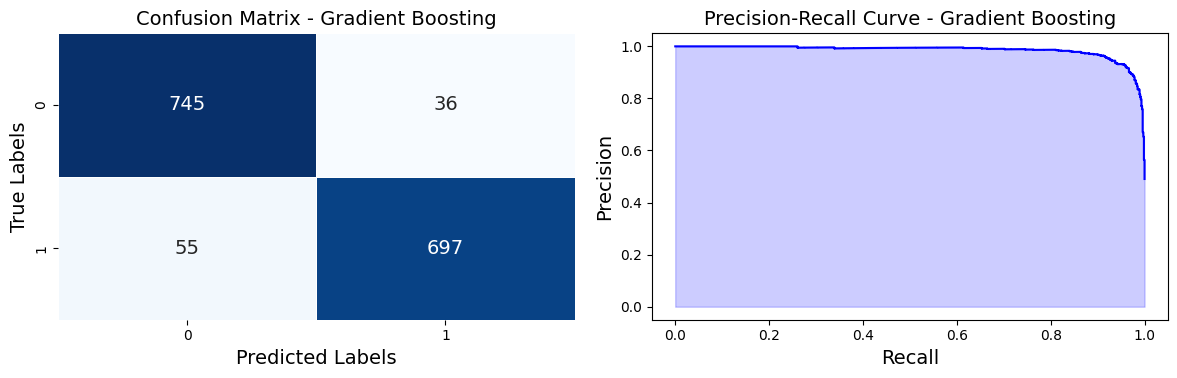


### XGBoost ###
Accuracy: 0.9328
Precision: 0.9513
Recall: 0.9096
F1 Score: 0.9300
PR AUC: 0.9836


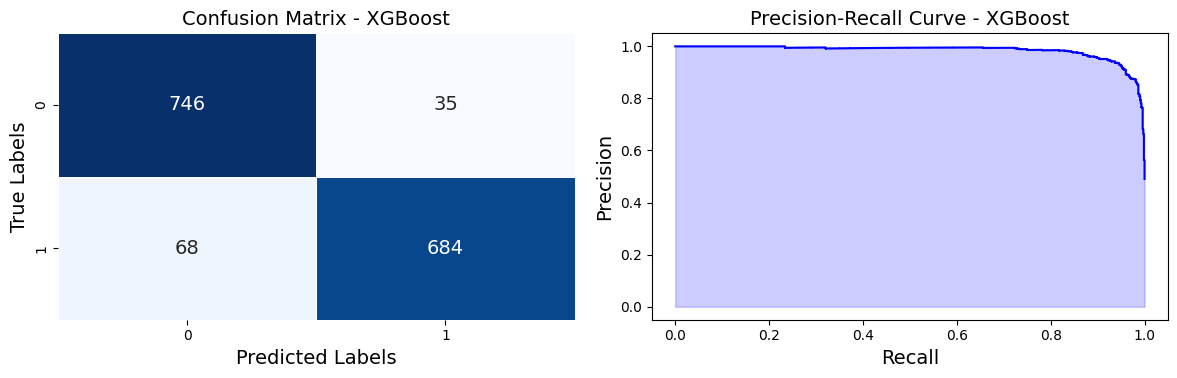

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 3089, number of negative: 3043
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001868 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5734
[LightGBM] [Info] Number of data points in the train set: 6132, number of used features: 337
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503751 -> initscore=0.015004
[LightGBM] [Info] Start training from score 0.015004
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

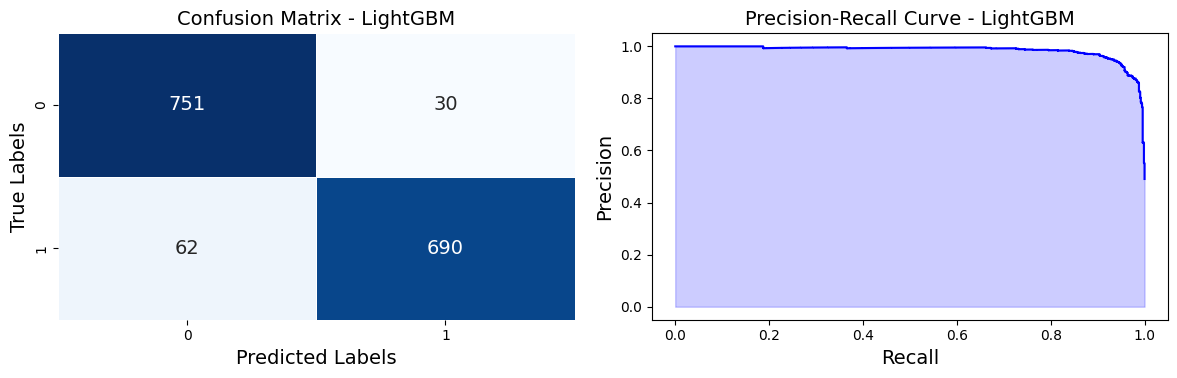

0:	learn: 0.6221108	total: 50.2ms	remaining: 4.97s
1:	learn: 0.5483563	total: 54.3ms	remaining: 2.66s
2:	learn: 0.4997168	total: 57.6ms	remaining: 1.86s
3:	learn: 0.4593722	total: 61.1ms	remaining: 1.47s
4:	learn: 0.4235888	total: 64.4ms	remaining: 1.22s
5:	learn: 0.3997805	total: 67.9ms	remaining: 1.06s
6:	learn: 0.3793157	total: 73.6ms	remaining: 977ms
7:	learn: 0.3617328	total: 76.9ms	remaining: 884ms
8:	learn: 0.3519375	total: 80.3ms	remaining: 812ms
9:	learn: 0.3395275	total: 83.5ms	remaining: 752ms
10:	learn: 0.3290277	total: 87ms	remaining: 704ms
11:	learn: 0.3179870	total: 90.3ms	remaining: 662ms
12:	learn: 0.3113451	total: 94ms	remaining: 629ms
13:	learn: 0.3017407	total: 97.6ms	remaining: 599ms
14:	learn: 0.2947533	total: 101ms	remaining: 573ms
15:	learn: 0.2866403	total: 105ms	remaining: 549ms
16:	learn: 0.2813506	total: 112ms	remaining: 547ms
17:	learn: 0.2767100	total: 119ms	remaining: 543ms
18:	learn: 0.2694806	total: 123ms	remaining: 523ms
19:	learn: 0.2650643	total: 126

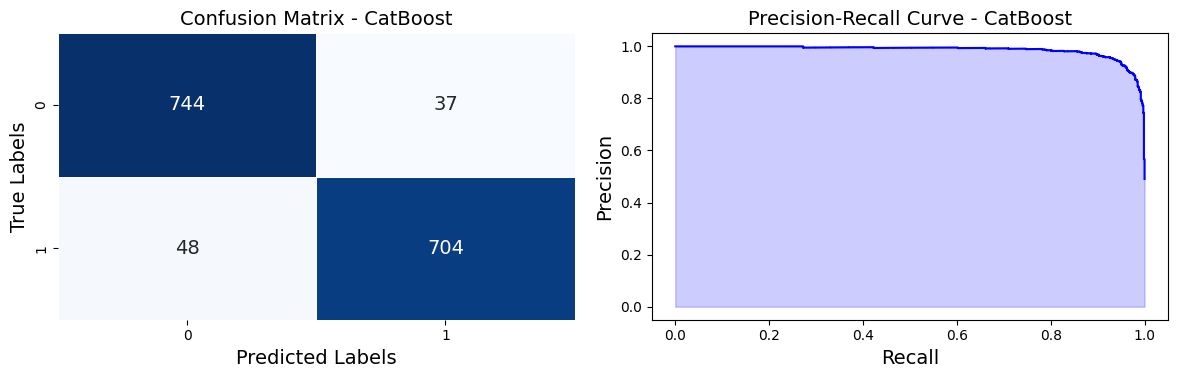

In [17]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
!pip install catboost
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import precision_recall_curve, auc

models = [
    ('Random Forest', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('LightGBM', LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('CatBoost', CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42))
]

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    pr_auc = auc(recall_curve, precision_curve)

    print(f"\n### {model_name} ###")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    plt.subplot(1, 2, 2)
    plt.step(recall_curve, precision_curve, where='post', color='b')
    plt.fill_between(recall_curve, precision_curve, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')

    plt.tight_layout()
    plt.show()

### 예측 결과 분석

 - y=0과 y=1의 비율이 반반 정도로 비슷하기 때문에 모델을 평가할 때 accuracy나 recall과 precision이 모두 고려된 f1 scorE 사용해서 평가하는 것이 좋다.
 - 또한 범주형 데이터가 매우 많기 때문에 catboost이나 ligthBGM을 사용하는 좋을 것이라고 생각된다.
 - 결과를 보면 catboost가 accuracy, f1 score모두 가장 좋은 것을 확인할 수 있다.


## 데이터셋 2

### 데이터 불러오기

In [18]:
data2 = pd.read_csv("./HW4_data2.csv", index_col=0)
data2.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,y
0,9.798870,10.255607,2.398926,O,7.632031,pumpkin,NaN,5.224159,7.395811,3.020821,...,3.020821,5.863069,Melon,4.923271,3.561303,6.806844,11.524446,6.171604,7.574321,1.0
1,4.024086,8.686860,5.497478,T,2.795630,prussian-blue,Swan,6.427589,3.051816,1.269890,...,1.269890,5.974401,Blood orange,7.926343,4.896212,4.824216,NaN,5.744455,5.912444,1.0
2,10.694008,8.927863,2.243809,T,9.747017,lilac,Ant,9.575909,2.143441,NaN,...,-3.554585,NaN,Miracle fruit,5.912005,3.548705,6.412018,8.094352,10.571801,8.135101,1.0
3,5.287692,9.996774,1.868769,T,-0.113201,yellow,Domestic canary,7.897008,5.801896,-6.649805,...,-6.649805,6.318679,Nance,7.165490,2.209230,9.569479,-0.210167,4.890815,3.754185,1.0
4,NaN,7.691494,7.500902,O,5.179994,olivine,Chimpanzee,8.991993,4.904515,2.595008,...,2.595008,6.689562,Watermelon,5.023897,4.806537,3.146238,NaN,6.584898,4.928658,1.0


### 데이터 형태 분석

In [19]:
data2.shape

(10000, 26)

In [20]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      9743 non-null   float64
 1   x1      10000 non-null  float64
 2   x2      7943 non-null   float64
 3   x3      8785 non-null   object 
 4   x4      10000 non-null  float64
 5   x5      8632 non-null   object 
 6   x6      5943 non-null   object 
 7   x7      10000 non-null  float64
 8   x8      10000 non-null  float64
 9   x9      8241 non-null   float64
 10  x10     8563 non-null   float64
 11  x11     10000 non-null  float64
 12  x12     8365 non-null   object 
 13  x13     10000 non-null  float64
 14  x14     10000 non-null  float64
 15  x15     10000 non-null  float64
 16  x16     10000 non-null  float64
 17  x17     8323 non-null   float64
 18  x18     8720 non-null   object 
 19  x19     10000 non-null  float64
 20  x20     10000 non-null  float64
 21  x21     10000 non-null  float64
 22 

In [21]:
data2.describe()

,x0,x1,x2,x4,x7,x8,x9,x10,x11,x13,...,x15,x16,x17,x19,x20,x21,x22,x23,x24,y
count,9743.000000,10000.000000,7943.000000,10000.000000,10000.000000,10000.000000,8241.000000,8563.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,8323.000000,10000.000000,10000.000000,10000.000000,7514.000000,10000.000000,9384.000000,10000.000000
mean,7.165975,7.126176,4.956557,4.911028,7.043465,4.807709,1.055407,7.234961,4.745654,7.126176,...,-0.639970,1.049745,5.995603,7.123629,4.897040,5.523869,5.099731,7.077097,4.924630,0.928900
std,2.763462,2.893061,3.009081,2.998248,2.055813,2.492194,5.722364,2.820694,2.780537,2.893061,...,5.972516,5.741045,1.205052,2.870985,2.834135,3.640854,3.952679,2.522013,2.799982,0.257005
min,-3.194130,-6.114683,-4.918373,-6.150613,-2.409528,-4.936459,-18.835607,-2.365416,-5.804453,-6.114683,...,-22.941035,-19.386521,1.681127,-4.155486,-5.476614,-12.142426,-11.271543,-2.946204,-5.746233,0.000000
25%,5.303499,5.141527,2.910819,2.870389,5.752638,3.132743,-2.674474,5.333044,2.869095,5.141527,...,-4.668849,-2.703759,5.188421,5.206403,2.964605,3.148899,2.500980,5.424001,3.016933,1.000000
50%,7.162715,7.124125,4.966196,4.942174,7.092630,4.811010,1.036151,7.272363,4.732722,7.124125,...,-0.828732,1.048230,5.990911,7.123673,4.877892,5.549038,5.153939,7.098980,4.857617,1.000000
75%,9.032210,9.105361,6.990305,6.965306,8.449762,6.486968,4.742762,9.115648,6.631677,9.105361,...,3.390424,4.779110,6.796298,9.056178,6.759636,8.023426,7.734758,8.754764,6.810554,1.000000
max,17.330441,18.109473,15.260845,15.923434,15.073453,14.913736,26.785734,19.362576,15.575809,18.109473,...,20.285741,26.785734,10.351359,17.421599,15.766760,18.909561,19.835530,17.091097,15.593164,1.000000


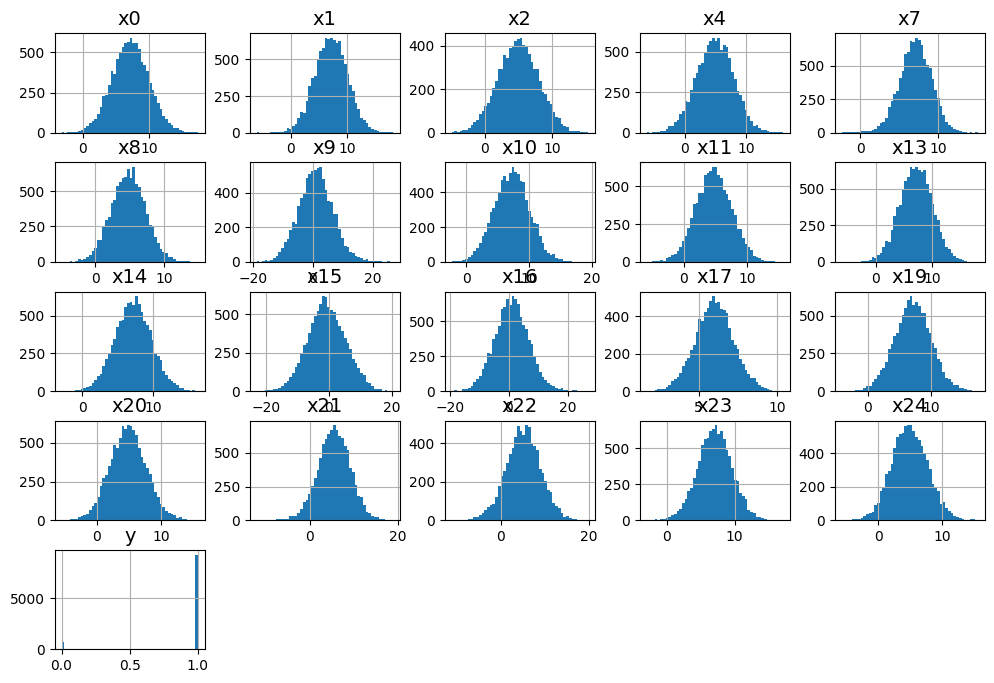

In [22]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

data2.hist(bins=50, figsize=(12, 8))
plt.show()

In [23]:
temp = data2.dropna(axis=0)
temp.shape

(1211, 26)

In [24]:
count_y_0 = data2[data2['y'] == 0].shape[0]
count_y_1 = data2[data2['y'] == 1].shape[0]
print("전체 y=0인 개수:", count_y_0)
print("전체 y=1인 개수:", count_y_1)

전체 y=0인 개수: 711
전체 y=1인 개수: 9289


**데이터 기본 특성**

1. x3, x5, x6, x12, x18 총 5개 데이터가 문자열이다.
2. 다양한 데이터 열에서 결측치가 많이 존재한다.
3. 만약 결측치를 다 삭제하면 데이터가 1/10 정도로 줄어든다.
4. 숫자형 데이터의 전반적인 스케일은 비슷하다.
5. 숫자형 데이터가 정규 분포 형태로 이쁘다.
6. y = 1인 데이터가 10배 이상 많다.

In [25]:
columns = ['x3', 'x5', 'x6', 'x12', 'x18']

for column in columns:
    value_counts = data2[column].value_counts()
    print(f"\n### {column} ###")
    print(value_counts)


### x3 ###
R    597
S    584
P    569
Q    562
T    558
U    533
O    517
V    513
N    474
M    463
W    458
X    433
L    391
Y    353
K    335
Z    323
J    252
I    214
H    196
G    135
F    118
E     68
D     56
C     39
A     24
B     20
Name: x3, dtype: int64

### x5 ###
periwinkle       195
quartz-grey      195
prussian-blue    188
rust             186
powder-blue      184
                ... 
auburn            10
beige             10
black              9
apricot            8
amber              8
Name: x5, Length: 83, dtype: int64

### x6 ###
list                   296
Donkey                  45
Guinea pig              43
Cat                     37
Dog                     32
                      ... 
Canidae                  3
Hyena                    3
Canid                    3
Domestic canary          3
Fancy rat varieties      1
Name: x6, Length: 473, dtype: int64

### x12 ###
pear                  102
robin-egg-blue         96
sapphire               90
psychedelic-purpl

**문자열 데이터 특성**
1. x6에는 list가 꽤나 큰 빈도로 등장한다.
2. 일부 데이터에 낮은 빈도로 등장하는 범주가 있다.
---
**처리 방법 후보**
1. 낮은 빈도를 기타 범주로 묶어버리기
2. 해당 데이터 삭제하기


In [26]:
columns = ['x' + str(i) for i in range(0, 25)]

for column in columns:
    temp = data2[pd.isnull(data2[column])]
    count_y_0 = temp[temp['y'] == 0].shape[0]
    count_y_1 = temp[temp['y'] == 1].shape[0]
    print(f"\n### {column} ###")
    print("y=0인 개수:", count_y_0)
    print("y=1인 개수:", count_y_1)


### x0 ###
y=0인 개수: 19
y=1인 개수: 238

### x1 ###
y=0인 개수: 0
y=1인 개수: 0

### x2 ###
y=0인 개수: 137
y=1인 개수: 1920

### x3 ###
y=0인 개수: 116
y=1인 개수: 1099

### x4 ###
y=0인 개수: 0
y=1인 개수: 0

### x5 ###
y=0인 개수: 114
y=1인 개수: 1254

### x6 ###
y=0인 개수: 329
y=1인 개수: 3728

### x7 ###
y=0인 개수: 0
y=1인 개수: 0

### x8 ###
y=0인 개수: 0
y=1인 개수: 0

### x9 ###
y=0인 개수: 131
y=1인 개수: 1628

### x10 ###
y=0인 개수: 94
y=1인 개수: 1343

### x11 ###
y=0인 개수: 0
y=1인 개수: 0

### x12 ###
y=0인 개수: 121
y=1인 개수: 1514

### x13 ###
y=0인 개수: 0
y=1인 개수: 0

### x14 ###
y=0인 개수: 0
y=1인 개수: 0

### x15 ###
y=0인 개수: 0
y=1인 개수: 0

### x16 ###
y=0인 개수: 0
y=1인 개수: 0

### x17 ###
y=0인 개수: 114
y=1인 개수: 1563

### x18 ###
y=0인 개수: 85
y=1인 개수: 1195

### x19 ###
y=0인 개수: 0
y=1인 개수: 0

### x20 ###
y=0인 개수: 0
y=1인 개수: 0

### x21 ###
y=0인 개수: 0
y=1인 개수: 0

### x22 ###
y=0인 개수: 163
y=1인 개수: 2323

### x23 ###
y=0인 개수: 0
y=1인 개수: 0

### x24 ###
y=0인 개수: 63
y=1인 개수: 553


In [27]:
missing_data_count = data2[['x3', 'x5', 'x6', 'x12', 'x18']].isnull().any(axis=1).sum()
missing_data_count

6446

**결측치 데이터 특성**

1. 결측치에 대한 분포를 살펴본 결과 y=0, y=1 분포가 대략 1:10 근처로 원본과 비슷하다.
2. 전반적으로 범주형 데이터에서 결측치가 많다.
3. 범주형 데이터에서 결측치를 가진 데이터를 모두 삭제하면 약 6500개의 데이터를 삭제해야 한다.

---

**처리 방법 후보**

1. 결측치가 있는 행은 삭제한다.
2. 숫자형 데이터는 정규분포와 비슷한 꼴이기 때문에 KNN으로 채워준다.
3. 숫자형 데이터의 결측치를 평균으로 채워준다.
4. 범주형 데이터의 결측치를 최빈값으로 채워준다.
5. 범주형 데이터의 결측치를 새로운 범주로 만든다.


### 데이터 전처리

In [28]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
numeric_columns = data2.select_dtypes(include=['float64']).columns
data2[numeric_columns] = imputer.fit_transform(data2[numeric_columns])
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      10000 non-null  float64
 1   x1      10000 non-null  float64
 2   x2      10000 non-null  float64
 3   x3      8785 non-null   object 
 4   x4      10000 non-null  float64
 5   x5      8632 non-null   object 
 6   x6      5943 non-null   object 
 7   x7      10000 non-null  float64
 8   x8      10000 non-null  float64
 9   x9      10000 non-null  float64
 10  x10     10000 non-null  float64
 11  x11     10000 non-null  float64
 12  x12     8365 non-null   object 
 13  x13     10000 non-null  float64
 14  x14     10000 non-null  float64
 15  x15     10000 non-null  float64
 16  x16     10000 non-null  float64
 17  x17     10000 non-null  float64
 18  x18     8720 non-null   object 
 19  x19     10000 non-null  float64
 20  x20     10000 non-null  float64
 21  x21     10000 non-null  float64
 22 

**숫자형 데이터 결측치 처리**
- 숫자형 데이터는 정규분포와 유사하게 분포하고 있어 KNN 알고리즘을 통해 결측치를 채워주었다.

In [29]:
target_columns = ['x5', 'x6', 'x12', 'x18']
threshold = 5

for column in target_columns:
    value_counts = data2[column].value_counts()
    data2[column] = data2[column].replace(value_counts[value_counts <= threshold].index, 'etc')

for column in target_columns:
    print(f"{column}:")
    print(data2[column].value_counts())
    print("\n")

x5:
periwinkle       195
quartz-grey      195
prussian-blue    188
rust             186
powder-blue      184
                ... 
auburn            10
beige             10
black              9
apricot            8
amber              8
Name: x5, Length: 83, dtype: int64


x6:
list             296
etc               86
Donkey            45
Guinea pig        43
Cat               37
                ... 
Dove               6
Crane              6
Domestic goat      6
Chimpanzee         6
Wildebeest         6
Name: x6, Length: 453, dtype: int64


x12:
pear                  102
robin-egg-blue         96
sapphire               90
psychedelic-purple     88
ruby                   87
                     ... 
alizarin                8
amber                   7
bronze                  7
amethyst                6
etc                     4
Name: x12, Length: 166, dtype: int64


x18:
Clementine    171
Nance         162
Olive         158
Prune         158
Physalis      158
             ... 
Blackberry  

**범주형 데이터 처리 1**
- 범주형 데이터에서 빈도가 5보다 낮은 데이터는 etc로 분리하였다.
- 그냥 데이터를 삭제해도 되지만 빈도수가 낮다는 정보도 가치가 있다고 생각해 따로 etc로 분리하였다.
- 또한 원 핫 인코딩을 진행하고 etc 데이터가 의미가 없다면 weight가 낮을 것이기 때문에 남겨두어도 괜찮다고 판단하였다.

In [30]:
target_columns = ['x3', 'x5', 'x6', 'x12', 'x18']

for column in target_columns:
    data2[column].fillna('Unknown', inplace=True)

data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x0      10000 non-null  float64
 1   x1      10000 non-null  float64
 2   x2      10000 non-null  float64
 3   x3      10000 non-null  object 
 4   x4      10000 non-null  float64
 5   x5      10000 non-null  object 
 6   x6      10000 non-null  object 
 7   x7      10000 non-null  float64
 8   x8      10000 non-null  float64
 9   x9      10000 non-null  float64
 10  x10     10000 non-null  float64
 11  x11     10000 non-null  float64
 12  x12     10000 non-null  object 
 13  x13     10000 non-null  float64
 14  x14     10000 non-null  float64
 15  x15     10000 non-null  float64
 16  x16     10000 non-null  float64
 17  x17     10000 non-null  float64
 18  x18     10000 non-null  object 
 19  x19     10000 non-null  float64
 20  x20     10000 non-null  float64
 21  x21     10000 non-null  float64
 22 

**범주형 데이터 처리 2**
- 범주형 데이터에서 결측치가 많고 각 feature에서 결측치가 겹치는 행도 적어서 결측치 자체에도 정보가 있을 수 있다고 생각해 결측치를 unkown이라는 범주로 분리하였다.
- 추후 원 핫 인코딩을 진행하고 unkown범주에 의미가 없다면 모델 학습 후 weight가 작을 것이다.

In [31]:
from sklearn.preprocessing import OneHotEncoder

target_columns = ['x3', 'x5', 'x6', 'x12', 'x18']

for column in target_columns:
    cat_encoder = OneHotEncoder(sparse_output=False)
    temp = data2[[column]]
    temp_encoded = cat_encoder.fit_transform(temp)
    temp_encoded_df = pd.DataFrame(temp_encoded, columns=cat_encoder.get_feature_names_out([column]))
    data2 = data2.drop(column, axis=1)
    data2 = pd.concat([data2, temp_encoded_df], axis=1)

data2.head()

,x0,x1,x2,x4,x7,x8,x9,x10,x11,x13,...,x18_Soursop,x18_Star fruit,x18_Strawberry,x18_Tamarillo,x18_Tamarind,x18_Tangerine,x18_Ugli fruit,x18_Unknown,x18_Watermelon,x18_Yuzu
0,9.798870,10.255607,2.398926,7.632031,5.224159,7.395811,3.020821,2.922330,6.308193,10.255607,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.024086,8.686860,5.497478,2.795630,6.427589,3.051816,1.269890,8.188415,3.232140,8.686860,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10.694008,8.927863,2.243809,9.747017,9.575909,2.143441,-3.367953,6.707861,6.514094,8.927863,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5.287692,9.996774,1.868769,-0.113201,7.897008,5.801896,-6.649805,10.350886,7.332060,9.996774,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,8.324842,7.691494,7.500902,5.179994,8.991993,4.904515,2.595008,7.856181,3.211784,7.691494,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


**범주형 데이터 처리 2**
 - 원 핫 인코딩을 통해 범주형 데이터를 처리하였다.
 - 각 범주가 순서가 있지 않기 때문에 원 핫 인코딩을 사용하였다.

### 모델 학슴 및 예측 결과

In [32]:
from sklearn.model_selection import train_test_split
import re

data2 = data2.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
train_set, test_set = train_test_split(data2, test_size=0.2, random_state=42)

X_train = train_set.drop('y', axis=1)
y_train = train_set['y']
X_test = test_set.drop('y', axis=1)
y_test = test_set['y']


### Random Forest ###
Accuracy: 0.9330
Precision: 0.9330
Recall: 1.0000
F1 Score: 0.9653
PR AUC: 0.9655


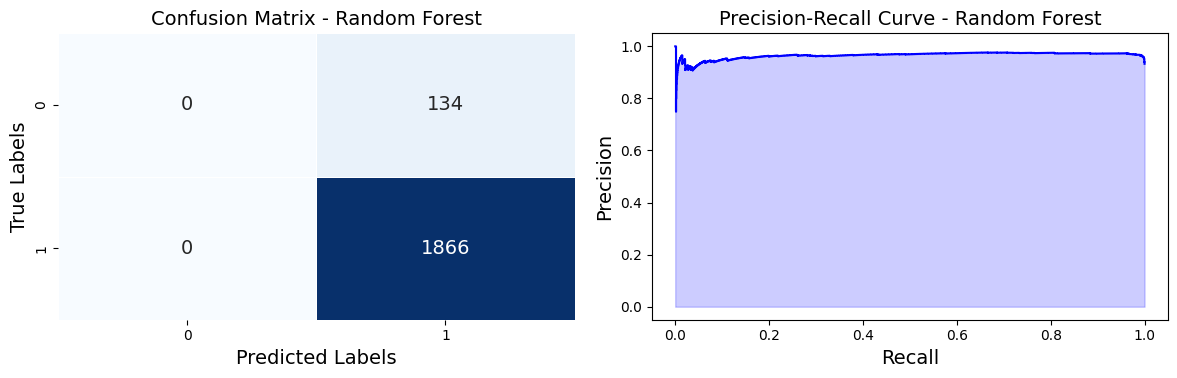


### AdaBoost ###
Accuracy: 0.9615
Precision: 0.9642
Recall: 0.9957
F1 Score: 0.9797
PR AUC: 0.9707


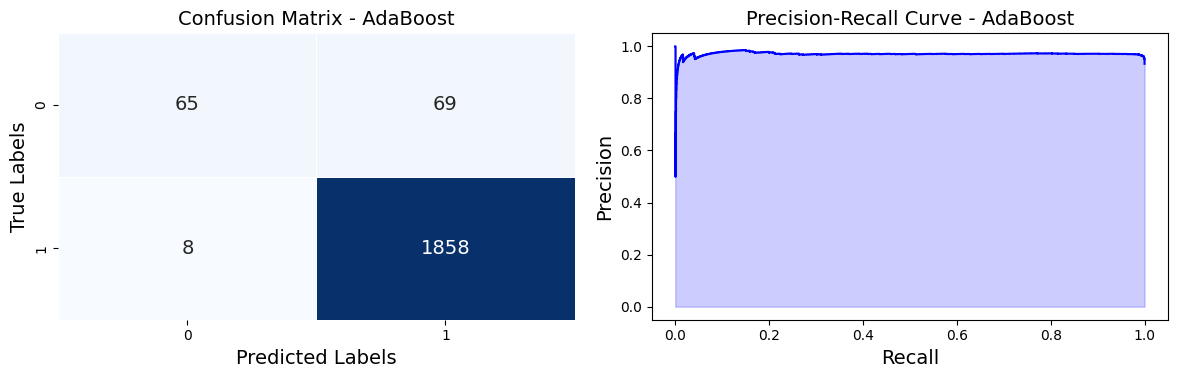


### Gradient Boosting ###
Accuracy: 0.9630
Precision: 0.9681
Recall: 0.9930
F1 Score: 0.9804
PR AUC: 0.9696


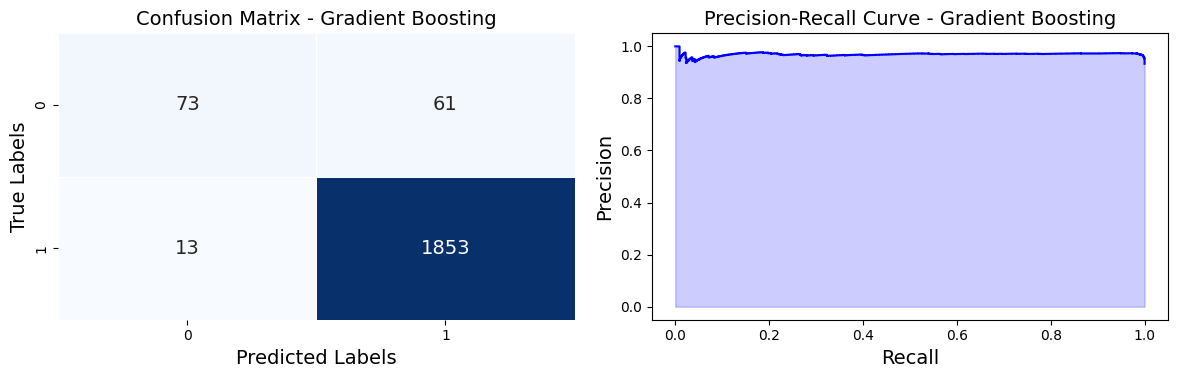


### XGBoost ###
Accuracy: 0.9680
Precision: 0.9688
Recall: 0.9979
F1 Score: 0.9831
PR AUC: 0.9687


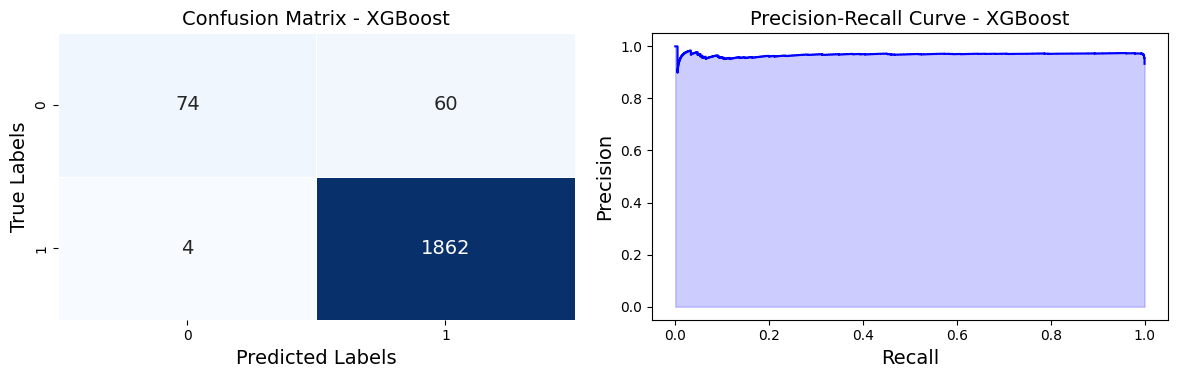

[LightGBM] [Info] Number of positive: 7423, number of negative: 577
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002801 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5742
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 341
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.927875 -> initscore=2.554496
[LightGBM] [Info] Start training from score 2.554496
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

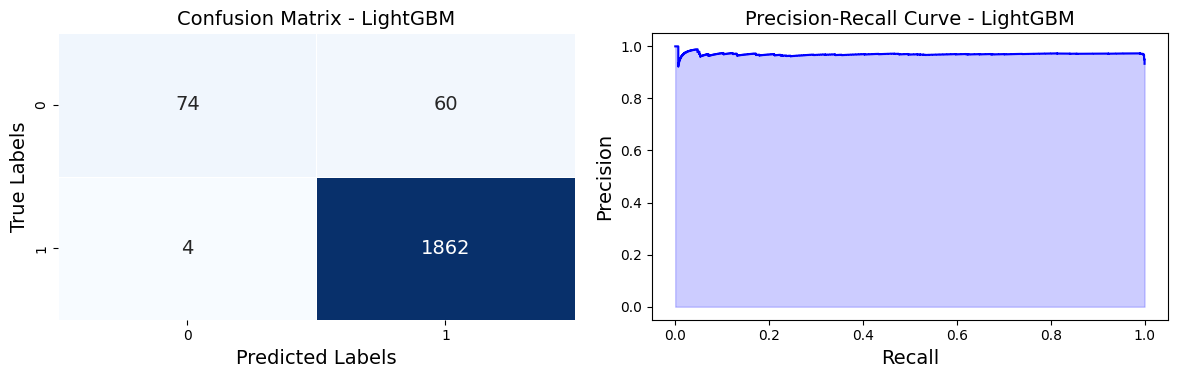

0:	learn: 0.5848616	total: 4.52ms	remaining: 448ms
1:	learn: 0.4847206	total: 8.77ms	remaining: 430ms
2:	learn: 0.4021976	total: 13ms	remaining: 422ms
3:	learn: 0.3465856	total: 17.3ms	remaining: 414ms
4:	learn: 0.3053875	total: 21.1ms	remaining: 401ms
5:	learn: 0.2796909	total: 25.1ms	remaining: 393ms
6:	learn: 0.2516347	total: 29.1ms	remaining: 386ms
7:	learn: 0.2314246	total: 32.9ms	remaining: 379ms
8:	learn: 0.2195188	total: 37.1ms	remaining: 375ms
9:	learn: 0.2048007	total: 41ms	remaining: 369ms
10:	learn: 0.1945358	total: 44.9ms	remaining: 363ms
11:	learn: 0.1890481	total: 48.9ms	remaining: 359ms
12:	learn: 0.1839590	total: 52.8ms	remaining: 354ms
13:	learn: 0.1787535	total: 56.9ms	remaining: 349ms
14:	learn: 0.1729383	total: 60.8ms	remaining: 344ms
15:	learn: 0.1697907	total: 64.5ms	remaining: 339ms
16:	learn: 0.1668908	total: 68.5ms	remaining: 334ms
17:	learn: 0.1630352	total: 72.4ms	remaining: 330ms
18:	learn: 0.1614873	total: 76.5ms	remaining: 326ms
19:	learn: 0.1584499	total

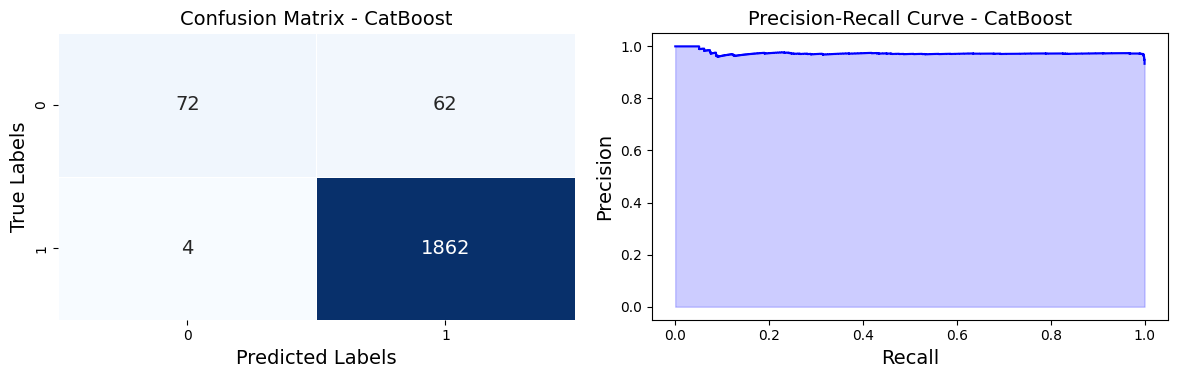

In [33]:
models = [
    ('Random Forest', RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)),
    ('AdaBoost', AdaBoostClassifier(n_estimators=50, learning_rate=1, random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('XGBoost', XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('LightGBM', LGBMClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)),
    ('CatBoost', CatBoostClassifier(iterations=100, learning_rate=0.1, depth=3, random_state=42))
]

for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])
    pr_auc = auc(recall_curve, precision_curve)

    print(f"\n### {model_name} ###")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"PR AUC: {pr_auc:.4f}")

    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", linewidths=.5, cbar=False)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')

    plt.subplot(1, 2, 2)
    plt.step(recall_curve, precision_curve, where='post', color='b')
    plt.fill_between(recall_curve, precision_curve, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')

    plt.tight_layout()
    plt.show()

### 예측 결과 분석

 - y=0과 y=1의 비율이 1: 10 정도로 많이 차이나기 때문에 0을 0이라고 예측 하는게 매우 중요하다.
 - 따라서 precision이나 PR커브를 이용해서 평가하는 것이 좋다.
 - 범주형 데이터가 매우 많기 때문에 catboost나 ligthBGM를 사용하는 좋을 것이라고 생각된다.
 - 결과를 보면 ligthBGM이 precision이 가장 높은 것을 확인할 수 있다.
 - 다만 모든 모델들이 false positive의 비율이 꽤나 높다.
